### CNOT and flipped CNOT gates

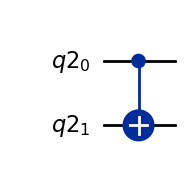

In [3]:
from qiskit import QuantumRegister, QuantumCircuit
reg = QuantumRegister(2)
circuit = QuantumCircuit(reg)
circuit.cx(reg[0], reg[1])
display(circuit.draw('mpl'))

### Toffoli gate

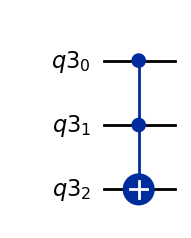

In [4]:
from qiskit import QuantumRegister, QuantumCircuit
reg = QuantumRegister(3)
circuit = QuantumCircuit(reg)
circuit.ccx(reg[0], reg[1], reg[2])
display(circuit.draw('mpl'))

### Working with Qiskit

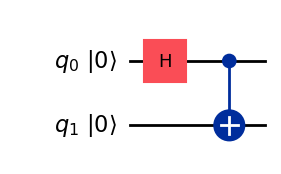

In [5]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
display(circ.draw('mpl', initial_state=True))

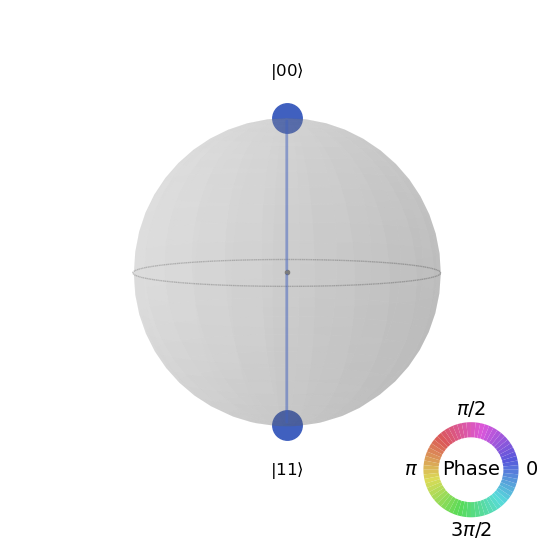

In [6]:
from qiskit.quantum_info import Statevector

vector = Statevector (circ)
display(vector.draw(output='qsphere'))

In [8]:
display(vector.draw(output='latex'))

<IPython.core.display.Latex object>

{'11': 490, '00': 534}


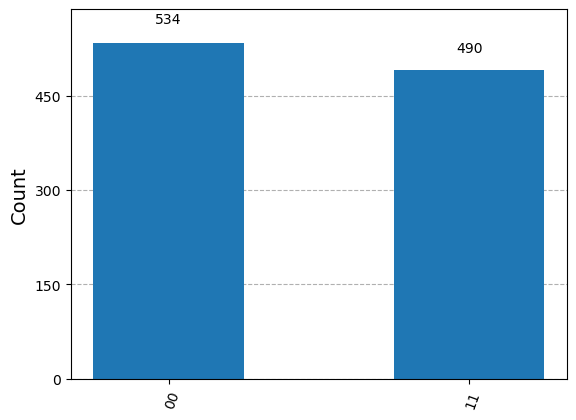

In [9]:
circ.measure_all()

from qiskit_aer import Aer
from qiskit.compiler import transpile

from qiskit.visualization import plot_histogram

device = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(circ, backend=device)
job = device.run(qc_transpiled)

counts = job.result().get_counts(circ)
print(counts)
plot_histogram(counts)

### Bell's experiment in Qiskit

In [10]:
from qiskit import QuantumCircuit


def get_circuit(angle_left, angle_right):
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.cx(0, 1)
    circ.x(1)
    circ.barrier()
    circ.ry(angle_left, 0)
    circ.ry(angle_right, 1)
    circ.measure_all()
    display(circ.draw('mpl'))
    return circ

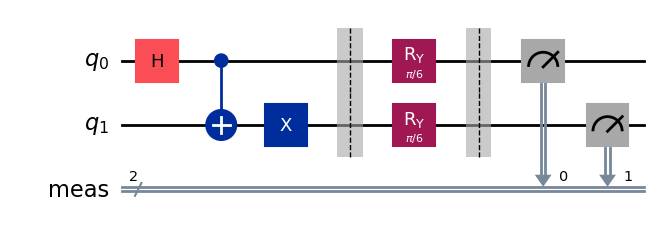

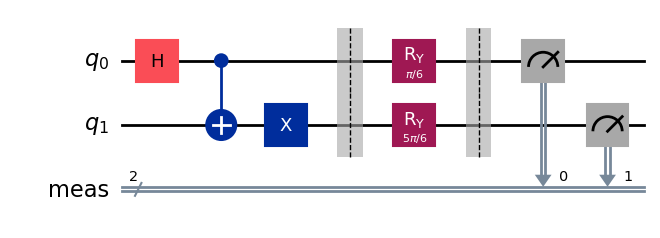

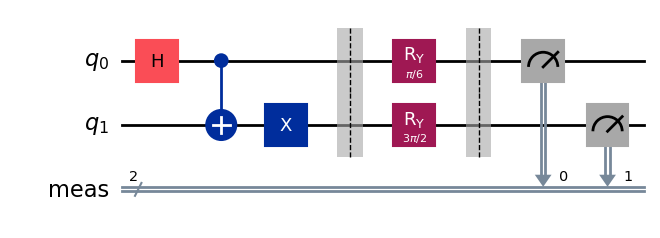

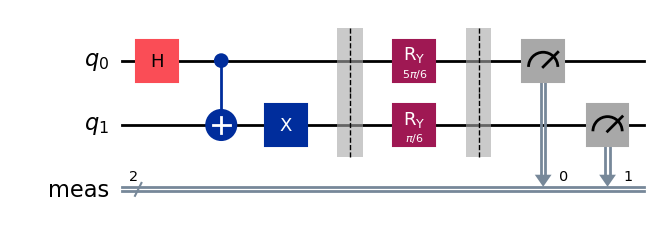

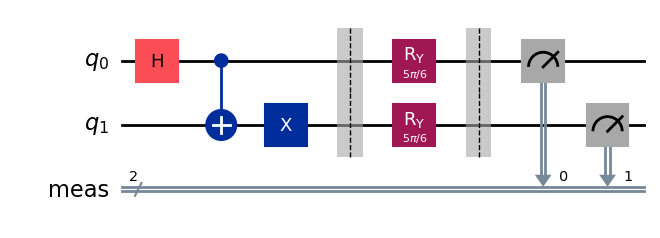

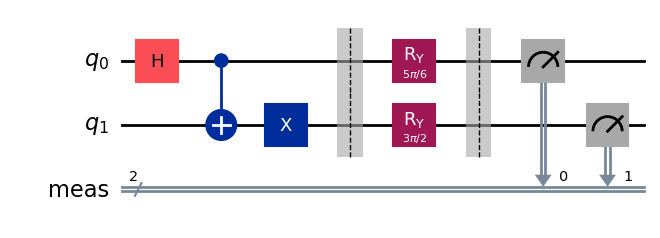

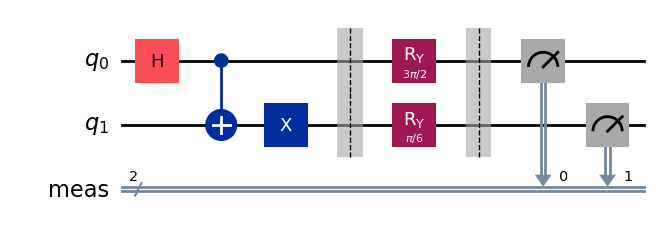

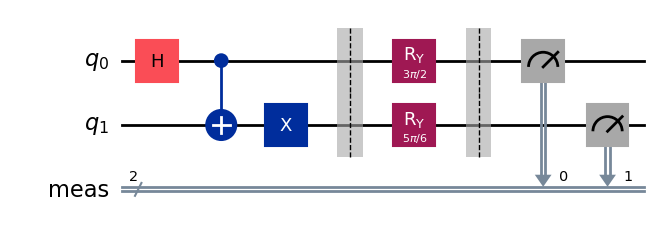

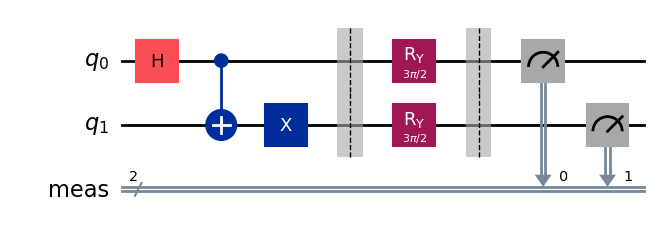

In [11]:
from math import pi

northwest = pi / 6
southwest = 5 * pi / 6
east = 9 * pi / 6
directions = [northwest, southwest, east]

circuits = []
for dir_left in directions:
    for dir_right in directions:
        circuits.append(
            get_circuit(dir_left, dir_right))

In [16]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the token
IBMtoken = os.getenv('TOKEN')

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Now you can use the token in your project
# If you did not previously save your credentials, use the following line instead:
service = QiskitRuntimeService(channel="ibm_quantum", token=IBMtoken)
 
# IBM_cloud_backends = service.get_backend('ibm_perth')

shots=100
qc_transpiled = transpile(circuits, backend=device)

job = device.run(qc_transpiled, shots=shots, memory=True)
result = job.result()


In [17]:
disagree = 0
for circ in circuits:
    memory = result.get_memory(circ)
    for meas in memory:
        if meas[0] != meas[1]:
            disagree += 1
print('\nProbability of disagreement: ', end='')
print(disagree / (9 * shots))


Probability of disagreement: 0.5033333333333333


### Question 4

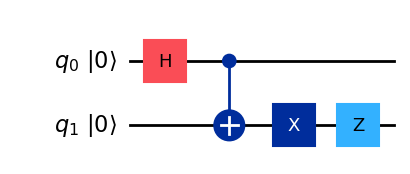

In [18]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.x(1)
circ.z(1)
display(circ.draw('mpl', initial_state=True))